In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = pd.read_csv('laptop_data.csv')
data_copy = data.copy()

In [ ]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
data.shape

(1303, 12)

Dataset has 1,303 rows and 12 columns

In [ ]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

***Conlcusion :*** No missing values


In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')

In [ ]:
data['Ram'] = data['Ram'].astype('int64')
data['Weight'] = data['Weight'].astype('float64')
data["Price"] = data["Price"].astype("int64")

***Exploratory Data Analysis***

In [ ]:
import seaborn as sns

C:\Users\faizp\AppData\Local\Temp\ipykernel_2372\4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

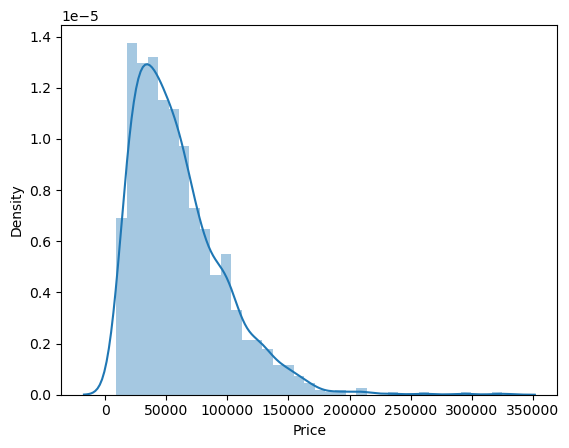

In [ ]:
sns.distplot(data['Price'])

<Axes: >

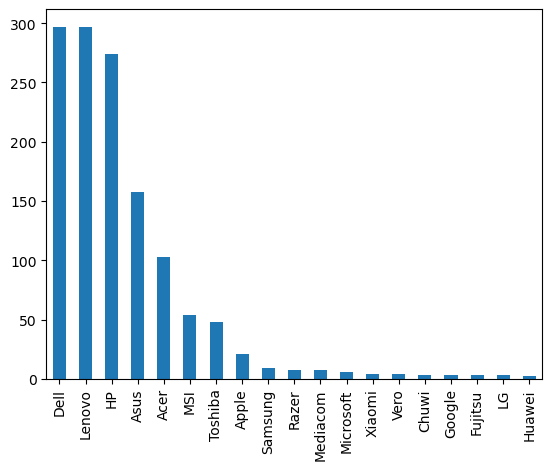

In [ ]:
data['Company'].value_counts().plot(kind='bar')


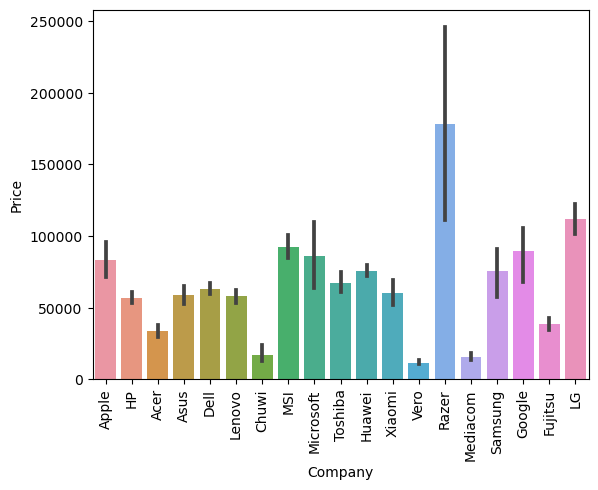

In [ ]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

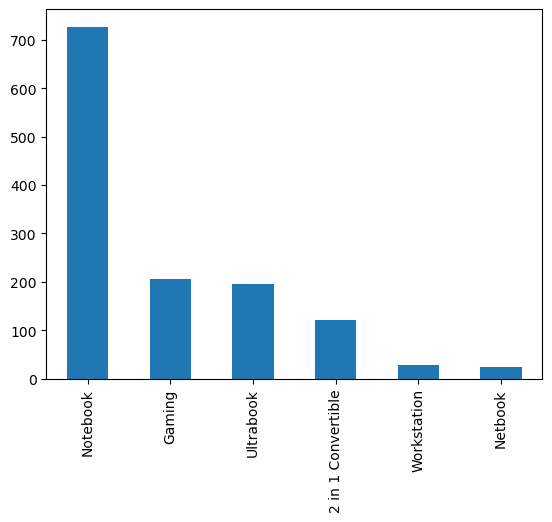

In [ ]:
data['TypeName'].value_counts().plot(kind='bar')

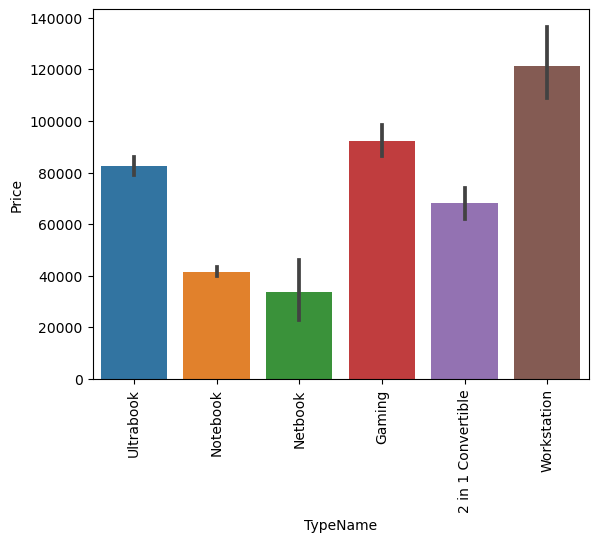

In [ ]:
sns.barplot(x=data["TypeName"],y=data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

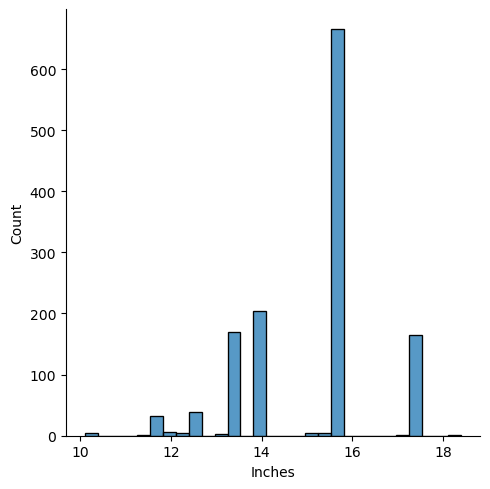

In [ ]:
sns.displot(data["Inches"])

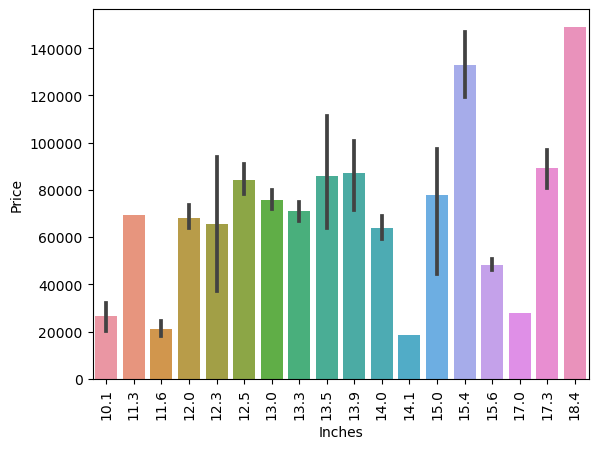

In [ ]:
sns.barplot(x=data["Inches"],y=data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

***Feature Engineering on Screen Resolution column***

In [ ]:
data["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
data["IsTouchScreen"] = data["ScreenResolution"].apply(lambda x : 1 if "Touchscreen " in x else 0)

In [ ]:
data["IsTouchScreen"].value_counts()

0    1111
1     192
Name: IsTouchScreen, dtype: int64

In [ ]:
data["IsTouchScreen"].sample(5)

1111    0
314     1
1       0
113     0
861     0
Name: IsTouchScreen, dtype: int64

In [ ]:
data["IsIpsPanel"] = data["ScreenResolution"].apply(lambda x : 1 if "IPS Panel" in x else 0)

In [ ]:
data["IsIpsPanel"].value_counts()

0    938
1    365
Name: IsIpsPanel, dtype: int64

**cheking price distributions of both of the new columns**

<Axes: xlabel='IsTouchScreen', ylabel='Price'>

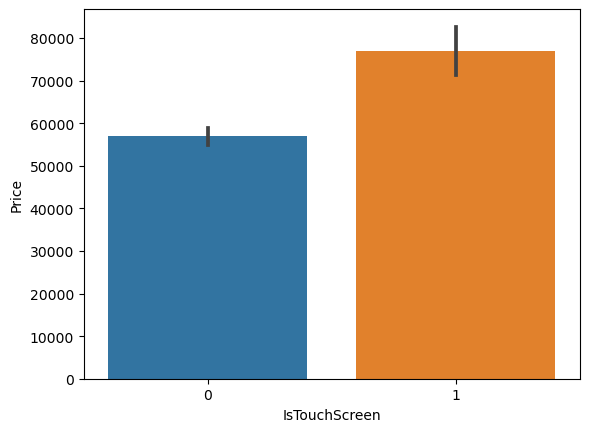

In [ ]:
sns.barplot(x=data["IsTouchScreen"],y=data["Price"])

<Axes: xlabel='IsIpsPanel', ylabel='Price'>

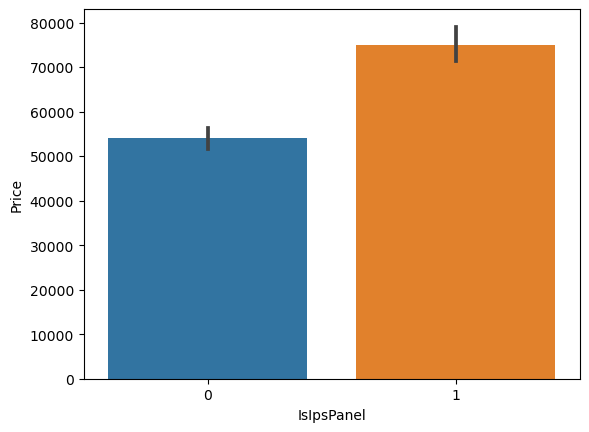

In [ ]:
sns.barplot(x=data["IsIpsPanel"],y=data["Price"])

**Etracting x and y resolutions from the data**

In [ ]:
new_df = data["ScreenResolution"].str.split("x",n=1,expand=True)
new_df.head(5)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
def extract_x(text):
    x_list =  text.split(" ")
    if len(x_list) > 1 :
        return x_list[-1]
    else :
        return x_list[0]
new_df["2"] = new_df[0].apply(extract_x)

In [ ]:
new_df.head(5)

,0,1,2
0,IPS Panel Retina Display 2560,1600,2560
1,1440,900,1440
2,Full HD 1920,1080,1920
3,IPS Panel Retina Display 2880,1800,2880
4,IPS Panel Retina Display 2560,1600,2560


In [ ]:
data["X_Resolution"] = new_df["2"].astype("int64")
data["Y_Resolution"] = new_df[1].astype("int64")

In [ ]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsTouchScreen,IsIpsPanel,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [ ]:
data.corr()["Price"]

C:\Users\faizp\AppData\Local\Temp\ipykernel_2372\2384927004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Price"]


Inches           0.068196
Ram              0.743007
Weight           0.210370
Price            1.000000
IsTouchScreen    0.191226
IsIpsPanel       0.252207
X_Resolution     0.556529
Y_Resolution     0.552809
Name: Price, dtype: float64

***Creating a new column called ppi***

In [ ]:
data["PPI"] = (((data["X_Resolution"]**2) + (data["Y_Resolution"]**2))**0.5)/(data["Inches"]).astype("float64")

In [ ]:
data.corr()["Price"]

C:\Users\faizp\AppData\Local\Temp\ipykernel_2372\2384927004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Price"]


Inches           0.068196
Ram              0.743007
Weight           0.210370
Price            1.000000
IsTouchScreen    0.191226
IsIpsPanel       0.252207
X_Resolution     0.556529
Y_Resolution     0.552809
PPI              0.473487
Name: Price, dtype: float64

In [ ]:
data.drop(columns={"ScreenResolution","Inches","X_Resolution","Y_Resolution"},inplace=True)

In [ ]:
data.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsTouchScreen,IsIpsPanel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [ ]:
data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
data["Cpu name"] = data["Cpu"].apply(lambda x : " ".join(x.split()[0:3]))

In [ ]:
data["Cpu name"].value_counts(5)*100

Intel Core i7               40.445127
Intel Core i5               32.463546
Intel Core i3               10.437452
Intel Celeron Dual           6.139678
Intel Pentium Quad           2.072141
Intel Core M                 1.458173
AMD A9-Series 9420           0.920952
Intel Celeron Quad           0.613968
AMD A6-Series 9220           0.613968
AMD A12-Series 9720P         0.537222
Intel Atom x5-Z8350          0.383730
AMD A8-Series 7410           0.306984
Intel Atom x5-Z8550          0.306984
Intel Pentium Dual           0.230238
AMD A9-Series 9410           0.230238
AMD Ryzen 1700               0.230238
AMD A9-Series A9-9420        0.153492
AMD A10-Series 9620P         0.153492
Intel Atom X5-Z8350          0.153492
AMD E-Series E2-9000e        0.153492
Intel Xeon E3-1535M          0.153492
Intel Xeon E3-1505M          0.153492
AMD E-Series 7110            0.153492
AMD A10-Series 9600P         0.153492
AMD A6-Series A6-9220        0.153492
AMD A10-Series A10-9620P     0.153492
AMD Ryzen 16

In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
data["cpu brand"] = data["Cpu name"].apply(fetch_processor)

<Axes: >

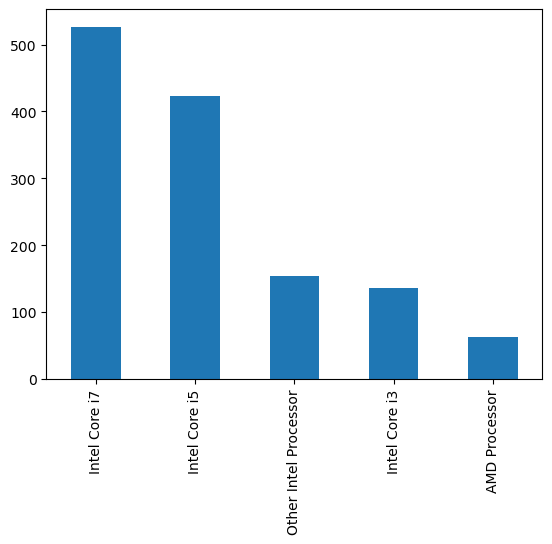

In [ ]:
data["cpu brand"].value_counts().plot(kind="bar")

***Price analysis wrt to the processor***

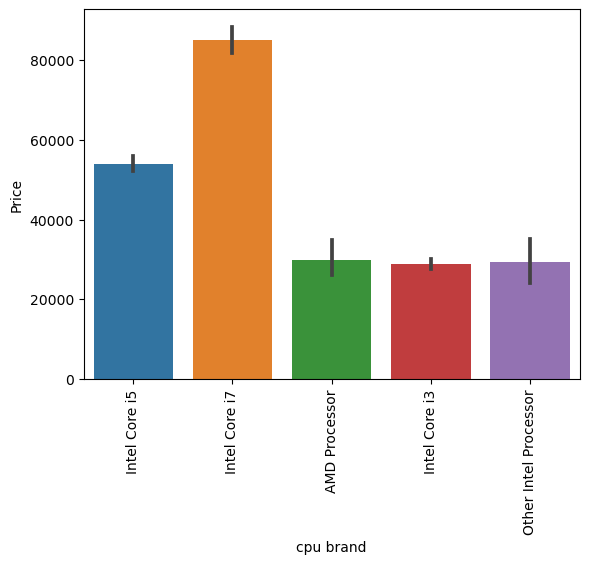

In [ ]:
sns.barplot(x=data["cpu brand"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
data.drop(columns={"Cpu name","Cpu"})

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IsTouchScreen,IsIpsPanel,PPI,cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705,0,0,100.454670,Intel Core i7


***Exploring trends in RAM***

<Axes: >

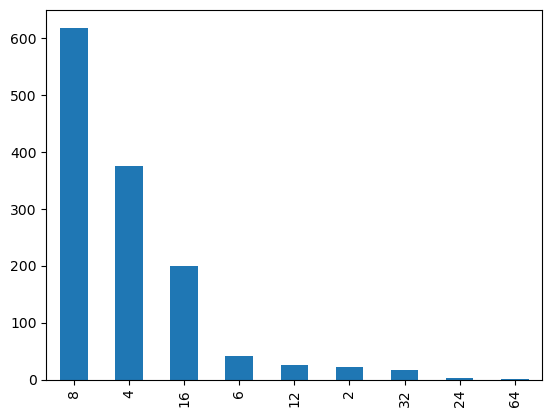

In [ ]:
data["Ram"].value_counts().plot(kind="bar")


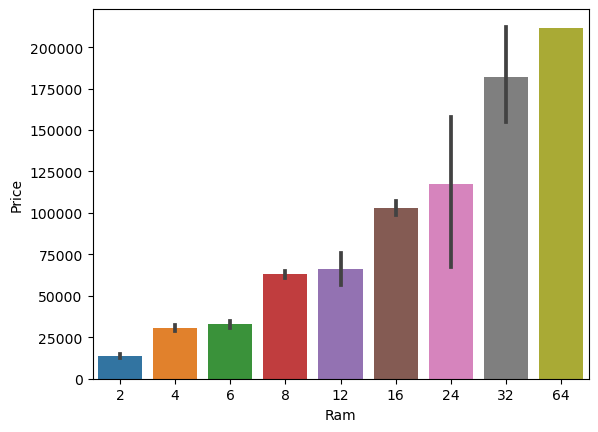

In [ ]:
sns.barplot(x=data["Ram"],y=data["Price"])
plt.show()

***Conclusion :*** Price increases as ram increases .

***feature engineering on memory column***

In [ ]:
data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
# Simplified code to extract the type of storage and store it in new columns

# Remove 'GB' and 'TB' from the 'Memory' column
data['Memory'] = data['Memory'].str.replace('GB', '').str.replace('TB', '000')

# Split 'Memory' column into two new columns
data[['first', 'second']] = data['Memory'].str.split("+", n=1, expand=True)
data['first'] = data['first'].str.strip()

# Extract information from 'first' column
data["HDD"] = data["first"].str.extract(r'(\d+).*HDD', expand=False).fillna(0).astype(int)
data["SSD"] = data["first"].str.extract(r'(\d+).*SSD', expand=False).fillna(0).astype(int)
data["Hybrid"] = data["first"].str.extract(r'(\d+).*Hybrid', expand=False).fillna(0).astype(int)
data["Flash_Storage"] = data["first"].str.extract(r'(\d+).*Flash Storage', expand=False).fillna(0).astype(int)
#Extract information from 'second' column
data["HDD"] += data["second"].str.extract(r'(\d+).*HDD', expand=False).fillna(0).astype(int)
data["SSD"] += data["second"].str.extract(r'(\d+).*SSD', expand=False).fillna(0).astype(int)
data["Hybrid"] += data["second"].str.extract(r'(\d+).*Hybrid', expand=False).fillna(0).astype(int)
data["Flash_Storage"] += data["second"].str.extract(r'(\d+).*Flash Storage', expand=False).fillna(0).astype(int)
#Drop unnecessary columns
data.drop(columns=['Memory', 'first', 'second'], inplace=True)


In [ ]:
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IsTouchScreen,IsIpsPanel,PPI,Cpu name,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


In [ ]:
data.corr()["Price"]

C:\Users\faizp\AppData\Local\Temp\ipykernel_2372\2384927004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Price"]


Ram              0.743007
Weight           0.210370
Price            1.000000
IsTouchScreen    0.191226
IsIpsPanel       0.252207
PPI              0.473487
HDD             -0.095477
SSD              0.670799
Hybrid          -0.004769
Flash_Storage   -0.040511
Name: Price, dtype: float64

***Conclusion :*** SSD is highly correlated to Price

In [ ]:
data["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
data["Gpu Brand"] = data["Gpu"].apply(lambda x : x.split()[0])


In [ ]:
data["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [ ]:
data = data[data["Gpu Brand"] != "ARM"]

In [ ]:
#comparing with price

<Axes: xlabel='Gpu Brand', ylabel='Price'>

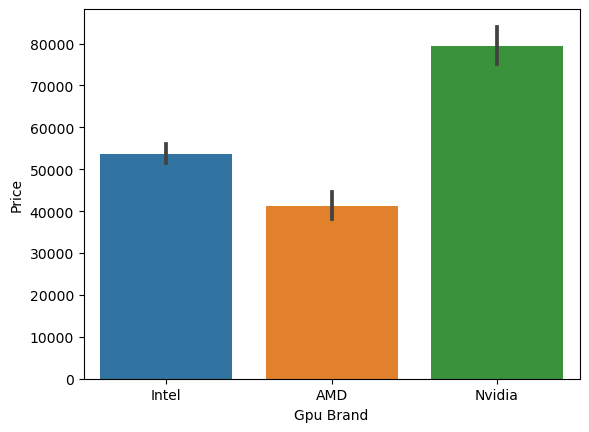

In [ ]:
sns.barplot(x=data["Gpu Brand"],y=data["Price"])

In [ ]:
data.head(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IsTouchScreen,IsIpsPanel,PPI,Cpu name,cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel


In [ ]:
data["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
#coincizing data to only three columns

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
data["OS"] = data["OpSys"].apply(cat_os)

In [ ]:
data.drop(columns=["OpSys"],inplace=True)

<Axes: xlabel='OS', ylabel='Price'>

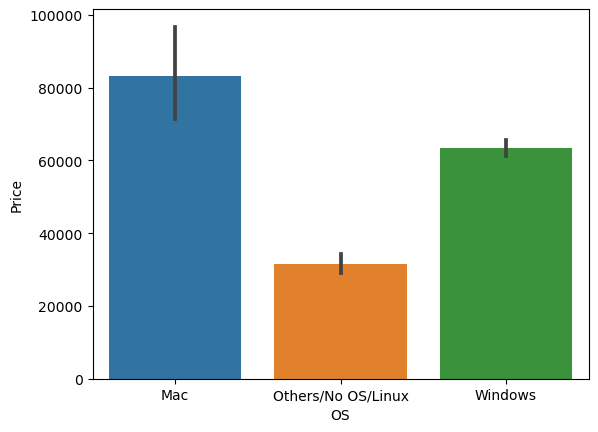

In [ ]:
sns.barplot(x=data["OS"],y=data["Price"])

In [ ]:
data.drop(columns={"Cpu","Gpu"},inplace=True)
data.head(5)


,Company,TypeName,Ram,Weight,Price,IsTouchScreen,IsIpsPanel,PPI,Cpu name,cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac


In [ ]:
data.drop(columns={"Cpu name","Hybrid","Flash_Storage"},inplace=True)

In [ ]:
print(data.shape)

(1302, 13)


***corr matrix anlysis***

C:\Users\faizp\AppData\Local\Temp\ipykernel_2372\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

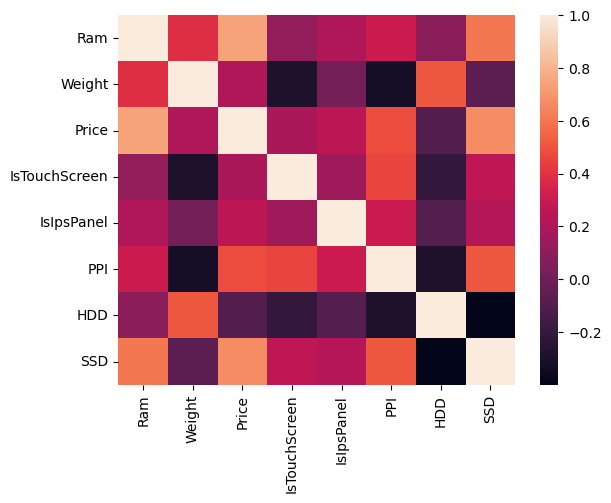

In [ ]:
sns.heatmap(data.corr())

***Target Column***

C:\Users\faizp\AppData\Local\Temp\ipykernel_2372\3789279340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["Price"]))


<Axes: xlabel='Price', ylabel='Density'>

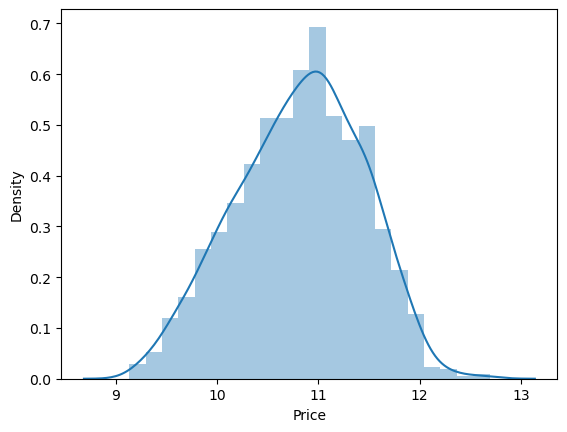

In [ ]:
sns.distplot(np.log(data["Price"]))

In [ ]:
X = data.drop(columns=['Price'])
Y = np.log(data['Price'])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Company,TypeName,Ram,Weight,IsTouchScreen,IsIpsPanel,PPI,cpu brand,HDD,SSD,Gpu Brand,OS
147,Asus,Notebook,4,2.00,0,0,141.211998,Other Intel Processor,1000,0,Intel,Windows
342,HP,Notebook,8,2.10,0,1,141.211998,Intel Core i3,1000,0,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,165.632118,Intel Core i7,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia,Windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel,Windows
1295,Dell,Notebook,8,2.30,0,0,100.454670,Intel Core i7,1000,0,AMD,Others/No OS/Linux
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel,Windows


In [ ]:
X_test

,Company,TypeName,Ram,Weight,IsTouchScreen,IsIpsPanel,PPI,cpu brand,HDD,SSD,Gpu Brand,OS
478,Dell,Notebook,8,2.20,0,0,141.211998,Intel Core i5,1000,0,AMD,Windows
724,MSI,Gaming,8,2.70,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows
312,MSI,Gaming,16,2.80,0,1,141.211998,Intel Core i7,1000,256,Nvidia,Windows
851,Asus,Gaming,16,2.10,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1276,Dell,Notebook,6,2.30,0,0,100.454670,Intel Core i3,1000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
199,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i7,0,256,Nvidia,Windows
296,Acer,Notebook,8,2.50,0,0,141.211998,Intel Core i7,0,256,Nvidia,Others/No OS/Linux
286,Lenovo,Notebook,8,1.95,0,1,141.211998,Intel Core i7,0,256,Intel,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows


***Linear Regression***

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2 score 0.8081465590136341
MAE 0.21459280089952099


C:\Users\faizp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***Ridge Regression***

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=0.01)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2 score 0.8081591228855572
MAE 0.2145907060691253


C:\Users\faizp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.0001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2 score 0.808407136547434
MAE 0.21440276426302424


C:\Users\faizp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_samples=0.75,
                              max_features=0.75,
                              max_depth=50)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

C:\Users\faizp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8714043981721095
MAE 0.16959846724539387


In [ ]:
import pickle

pickle.dump(data,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
from joblib import dump

# Save the model
dump(pipe, 'pipe.joblib')


NameError: name 'pipe' is not defined